<a href="https://colab.research.google.com/github/dfdavila/AI6/blob/master/DL_Lesson_1_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
#!pip install http://download.pytorch.org/whl/cpu/torch-1.0.0-cp36-cp36m-linux_x86_64.whl
#!pip install fastai --upgrade
#!pip install -q matplotlib-venn tensorflow

  Using cached https://files.pythonhosted.org/packages/ee/67/f403d4ae6e9cd74b546ee88cccdb29b8415a9c1b3d80aebeb20c9ea91d96/pytorch-1.0.2.tar.gz
  ERROR: Could not find a version that satisfies the requirement torchvision==9.0 (from versions: 0.1.6, 0.1.7, 0.1.8, 0.1.9, 0.2.0, 0.2.1, 0.2.2, 0.2.2.post2, 0.2.2.post3, 0.3.0)
ERROR: No matching distribution found for torchvision==9.0


In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [0]:
from fastai import *
from fastai.vision import *
from fastai.metrics import error_rate

In [3]:
help(untar_data)

Help on function untar_data in module fastai.datasets:

untar_data(url:str, fname:Union[pathlib.Path, str]=None, dest:Union[pathlib.Path, str]=None, data=True, force_download=False) -> pathlib.Path
    Download `url` to `fname` if `dest` doesn't exist, and un-tgz to folder `dest`.



In [4]:
path = untar_data(URLs.PETS); path #Getting the data
print(f'Ruta{path}')

Ruta/root/.fastai/data/oxford-iiit-pet


In [5]:
path.ls()

[PosixPath('/root/.fastai/data/oxford-iiit-pet/annotations'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images')]

In [6]:
print(path)
path_anno = path/'annotations'
path_img = path/'images'

/root/.fastai/data/oxford-iiit-pet


In [7]:
print(path_anno)
print(path_img )

/root/.fastai/data/oxford-iiit-pet/annotations
/root/.fastai/data/oxford-iiit-pet/images


In [8]:
fnames= get_image_files(path_img)
fnames[:10]

[PosixPath('/root/.fastai/data/oxford-iiit-pet/images/saint_bernard_15.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/Siamese_83.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/wheaten_terrier_135.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/chihuahua_26.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/basset_hound_174.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/saint_bernard_186.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/Birman_76.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/Ragdoll_143.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/saint_bernard_178.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/great_pyrenees_106.jpg')]

In [0]:
np.random.seed(2)
pat = r'/([^/]+)_\d+.jpg$' #Regular expressions

In [10]:
data = ImageDataBunch.from_name_re(path_img, fnames,pat, ds_tfms=get_transforms(),size=224) #Loading the data
data.normalize(imagenet_stats) #Data Transformation

ImageDataBunch;

Train: LabelList (5912 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
saint_bernard,Siamese,wheaten_terrier,saint_bernard,Birman
Path: /root/.fastai/data/oxford-iiit-pet/images;

Valid: LabelList (1478 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
newfoundland,great_pyrenees,miniature_pinscher,miniature_pinscher,Abyssinian
Path: /root/.fastai/data/oxford-iiit-pet/images;

Test: None

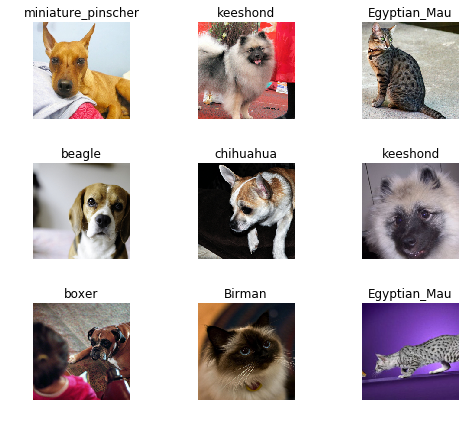

In [11]:
data.show_batch(rows=3, figsize=(7,6)) #Looking at the data

In [12]:
print(data.classes) #Looking at the labels
len(data.classes),data.c

['Abyssinian', 'Bengal', 'Birman', 'Bombay', 'British_Shorthair', 'Egyptian_Mau', 'Maine_Coon', 'Persian', 'Ragdoll', 'Russian_Blue', 'Siamese', 'Sphynx', 'american_bulldog', 'american_pit_bull_terrier', 'basset_hound', 'beagle', 'boxer', 'chihuahua', 'english_cocker_spaniel', 'english_setter', 'german_shorthaired', 'great_pyrenees', 'havanese', 'japanese_chin', 'keeshond', 'leonberger', 'miniature_pinscher', 'newfoundland', 'pomeranian', 'pug', 'saint_bernard', 'samoyed', 'scottish_terrier', 'shiba_inu', 'staffordshire_bull_terrier', 'wheaten_terrier', 'yorkshire_terrier']


(37, 37)

**Training a model using resnet architecture: resnet34**

In [13]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth
100%|██████████| 87306240/87306240 [00:01<00:00, 54331867.92it/s]


In [14]:
learn.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (rel

In [15]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.394094,0.369540,0.111637,01:20
1,0.529301,0.276313,0.089310,01:20
2,0.329721,0.246768,0.082544,01:19
3,0.241344,0.240101,0.079838,01:20


In [0]:
learn.save('stage-1') #Saving model weights

In [17]:
interp = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

True

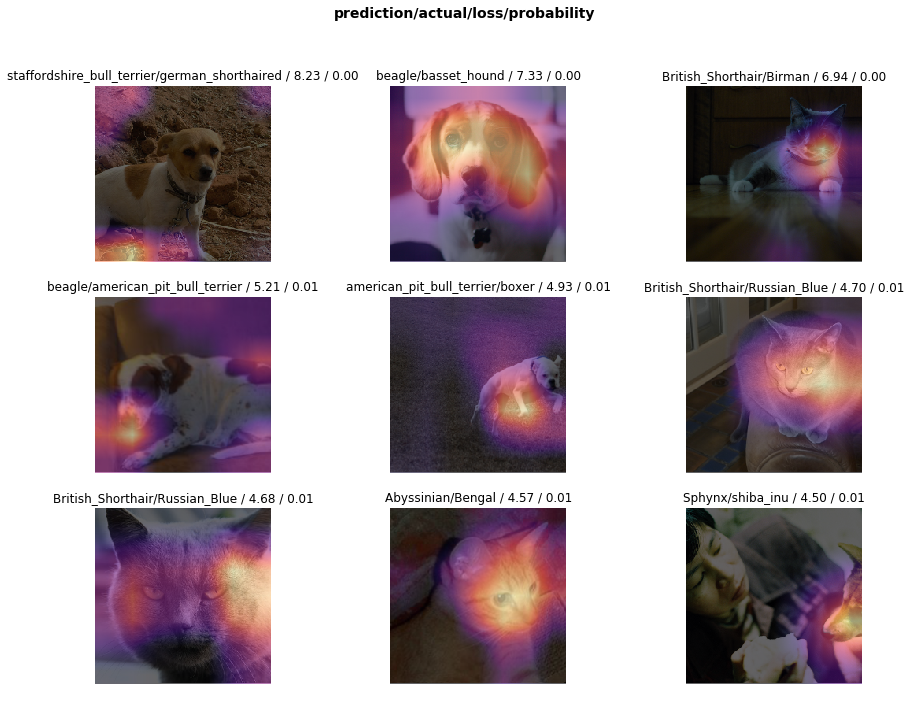

In [18]:
interp.plot_top_losses(9, figsize=(15,11))

In [19]:
#Press doc para ver la documentacion

doc(interp.plot_top_losses)


In [25]:
doc(ImageDataBunch)

**Confusion Matrix:**

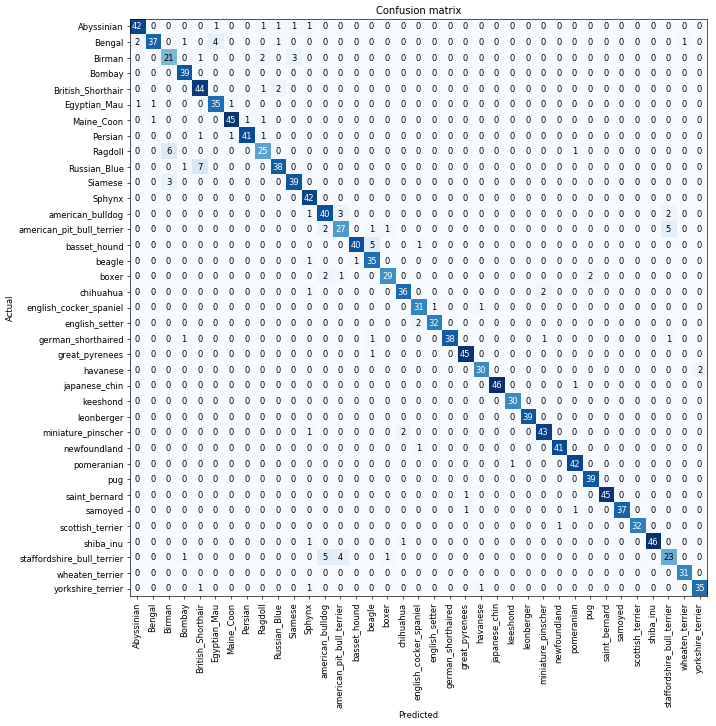

In [26]:
interp.plot_confusion_matrix(figsize=(12,12),dpi=60)

**Most confused categories**

In [27]:
interp.most_confused(min_val=2)

[('Russian_Blue', 'British_Shorthair', 7),
 ('Ragdoll', 'Birman', 6),
 ('american_pit_bull_terrier', 'staffordshire_bull_terrier', 5),
 ('basset_hound', 'beagle', 5),
 ('staffordshire_bull_terrier', 'american_bulldog', 5),
 ('Bengal', 'Egyptian_Mau', 4),
 ('staffordshire_bull_terrier', 'american_pit_bull_terrier', 4),
 ('Birman', 'Siamese', 3),
 ('Siamese', 'Birman', 3),
 ('american_bulldog', 'american_pit_bull_terrier', 3),
 ('Bengal', 'Abyssinian', 2),
 ('Birman', 'Ragdoll', 2),
 ('British_Shorthair', 'Russian_Blue', 2),
 ('american_bulldog', 'staffordshire_bull_terrier', 2),
 ('american_pit_bull_terrier', 'american_bulldog', 2),
 ('boxer', 'american_bulldog', 2),
 ('boxer', 'pug', 2),
 ('chihuahua', 'miniature_pinscher', 2),
 ('english_setter', 'english_cocker_spaniel', 2),
 ('havanese', 'yorkshire_terrier', 2),
 ('miniature_pinscher', 'chihuahua', 2)]

**IMPROVING THE MODEL: Unfreezing, fine-tuning, and learning rates**

In [0]:
learn.unfreeze() #train the whole model

In [29]:
learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,error_rate,time
0,0.485249,0.379782,0.121110,01:21


In [0]:
learn.load('stage-1'); #Load the weights

In [31]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


Text(0.5, 1.0, 'Loss Vs Learning Rate')

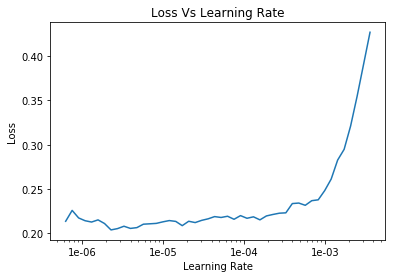

In [32]:
learn.recorder.plot()
plt.title("Loss Vs Learning Rate")

In [0]:
learn.unfreeze()

In [34]:
learn.fit_one_cycle(2, max_lr=slice(1e-06,1e-04)) #Pass a range of learning rates (here)

epoch,train_loss,valid_loss,error_rate,time
0,0.230826,0.234612,0.077131,01:21
1,0.202952,0.228530,0.075101,01:21


**Training: resnet50**

In [0]:
#data = ImageDataBunch.from_name_re(path_img, fnames, pat, ds_tfms=get_transforms(),
                                   size=299, bs=2).normalize(imagenet_stats)

In [52]:
data = ImageDataBunch.from_name_re(path_img, fnames, pat, ds_tfms=get_transforms(), size=320, bs=2)
data.normalize(imagenet_stats)

ImageDataBunch;

Train: LabelList (5912 items)
x: ImageList
Image (3, 320, 320),Image (3, 320, 320),Image (3, 320, 320),Image (3, 320, 320),Image (3, 320, 320)
y: CategoryList
saint_bernard,Siamese,wheaten_terrier,chihuahua,basset_hound
Path: /root/.fastai/data/oxford-iiit-pet/images;

Valid: LabelList (1478 items)
x: ImageList
Image (3, 320, 320),Image (3, 320, 320),Image (3, 320, 320),Image (3, 320, 320),Image (3, 320, 320)
y: CategoryList
shiba_inu,Maine_Coon,great_pyrenees,shiba_inu,Birman
Path: /root/.fastai/data/oxford-iiit-pet/images;

Test: None

In [53]:
learn = cnn_learner(data, models.resnet50, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/checkpoints/resnet50-19c8e357.pth
100%|██████████| 102502400/102502400 [00:01<00:00, 65415558.42it/s]


In [54]:
learn.fit_one_cycle(8, max_lr=slice(1e-3))

epoch,train_loss,valid_loss,error_rate,time
0,2.977003,1.767453,0.480379,03:27
1,2.285428,0.972286,0.280108,03:21
2,2.281568,0.670585,0.205683,03:20
3,2.170570,0.636901,0.221245,03:19
4,1.927736,0.514493,0.169824,03:19
5,1.911684,0.480662,0.154263,03:18
6,1.777488,0.454792,0.155616,03:18
7,1.711137,0.451225,0.155616,03:19


In [0]:
learn.save('stage-1-50')

In [56]:
learn.unfreeze()
learn.fit_one_cycle(3, max_lr=slice(1e-6,1e-4))

epoch,train_loss,valid_loss,error_rate,time
0,1.976690,0.488673,0.171177,03:53
1,1.721838,0.470768,0.152233,03:51
2,1.752909,0.464875,0.161028,03:51


In [0]:
learn.load('stage-1-50');

**Interpreting the results again**

In [0]:
interp = ClassificationInterpretation.from_learner(learn)

In [59]:
interp.most_confused(min_val=2)

[('american_pit_bull_terrier', 'staffordshire_bull_terrier', 17),
 ('Birman', 'Ragdoll', 15),
 ('Maine_Coon', 'Bengal', 15),
 ('Egyptian_Mau', 'Bengal', 9),
 ('american_bulldog', 'boxer', 9),
 ('Abyssinian', 'Bengal', 8),
 ('Russian_Blue', 'British_Shorthair', 7),
 ('boxer', 'saint_bernard', 6),
 ('Bengal', 'Egyptian_Mau', 5),
 ('miniature_pinscher', 'chihuahua', 5),
 ('Abyssinian', 'Egyptian_Mau', 4),
 ('Birman', 'Siamese', 4),
 ('Bombay', 'British_Shorthair', 4),
 ('Ragdoll', 'Persian', 4),
 ('american_bulldog', 'saint_bernard', 4),
 ('american_pit_bull_terrier', 'american_bulldog', 4),
 ('american_pit_bull_terrier', 'german_shorthaired', 4),
 ('boxer', 'american_bulldog', 4),
 ('great_pyrenees', 'samoyed', 4),
 ('Abyssinian', 'Maine_Coon', 3),
 ('Maine_Coon', 'Persian', 3),
 ('Ragdoll', 'Birman', 3),
 ('Ragdoll', 'Siamese', 3),
 ('Siamese', 'Birman', 3),
 ('american_pit_bull_terrier', 'chihuahua', 3),
 ('english_cocker_spaniel', 'english_setter', 3),
 ('Bombay', 'Russian_Blue', 2),


**Other data formats**

In [60]:
path = untar_data(URLs.MNIST_SAMPLE); path

PosixPath('/root/.fastai/data/mnist_sample')

In [61]:
path.ls()

[PosixPath('/root/.fastai/data/mnist_sample/labels.csv'),
 PosixPath('/root/.fastai/data/mnist_sample/valid'),
 PosixPath('/root/.fastai/data/mnist_sample/train')]

**Scenario 1: Labels are folder names**

In [62]:
(path/'train').ls()

[PosixPath('/root/.fastai/data/mnist_sample/train/7'),
 PosixPath('/root/.fastai/data/mnist_sample/train/3')]

In [0]:
tfms = get_transforms(do_flip=False)
data = ImageDataBunch.from_folder(path, ds_tfms=tfms, size=26)

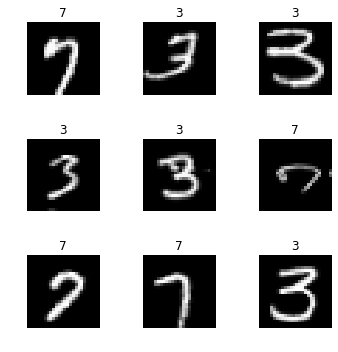

In [64]:
data.show_batch(rows=3, figsize=(5,5))

In [65]:
learn = cnn_learner(data, models.resnet18, metrics=accuracy)
learn.fit(2)

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /root/.cache/torch/checkpoints/resnet18-5c106cde.pth
100%|██████████| 46827520/46827520 [00:01<00:00, 34868567.84it/s]


epoch,train_loss,valid_loss,accuracy,time
0,0.175218,0.089129,0.967125,00:17
1,0.089611,0.044717,0.984298,00:16


**Scenario 2: CSV file**

In [66]:
df = pd.read_csv(path/'labels.csv')
df.head()

,name,label
0,train/3/7463.png,0
1,train/3/21102.png,0
2,train/3/31559.png,0
3,train/3/46882.png,0
4,train/3/26209.png,0


In [0]:
data = ImageDataBunch.from_csv(path, ds_tfms=tfms, size=28)

[0, 1]

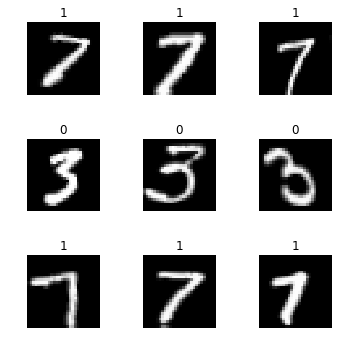

In [68]:
data.show_batch(rows=3, figsize=(5,5))
data.classes

In [69]:
data = ImageDataBunch.from_df(path, df, ds_tfms=tfms, size=24)
data.classes

[0, 1]

**Scenario 3: Using regular expression**

In [70]:
fn_paths = [path/name for name in df['name']]; fn_paths[:2]

[PosixPath('/root/.fastai/data/mnist_sample/train/3/7463.png'),
 PosixPath('/root/.fastai/data/mnist_sample/train/3/21102.png')]

In [71]:
pat = r"/(\d)/\d+\.png$"
data = ImageDataBunch.from_name_re(path, fn_paths, pat=pat, ds_tfms=tfms, size=24)
data.classes

['3', '7']

In [72]:
data = ImageDataBunch.from_name_func(path, fn_paths, ds_tfms=tfms, size=24,
        label_func = lambda x: '3' if '/3/' in str(x) else '7')
data.classes

['3', '7']

In [73]:
labels = [('3' if '/3/' in str(x) else '7') for x in fn_paths]
labels[:5]

['3', '3', '3', '3', '3']

In [74]:
data = ImageDataBunch.from_lists(path, fn_paths, labels=labels, ds_tfms=tfms, size=24)
data.classes

['3', '7']

**Scenario 4: Something more complex**

In [80]:
from_name_func:
data = ImageDataBunch.from_name_func(path, fn_paths, ds_tfms=tfms, size=24,
        label_func = lambda x: '3' if '/3/' in str(x) else '7')
data.classes

SyntaxError: ignored

**Scenario 5: You need something even more flexible**

In [81]:
labels = [('3' if '/3/' in str(x) else '7') for x in fn_paths]
labels[:5]

['3', '3', '3', '3', '3']

In [82]:
data = ImageDataBunch.from_lists(path, fn_paths, labels=labels, ds_tfms=tfms, size=24)
data.classes

['3', '7']